In [359]:
import pandas as pd
import numpy as np
import os 

In [366]:
CWD = os.getcwd() # directory of the notebook
ROOT,_ = os.path.split(CWD) # root folder of the project 
DATA_DIR = os.path.join(ROOT,'raw_data')
DATA_PATH = os.path.join(DATA_DIR, 'train_data.csv')

# Project root path on your machine
print "Data location: {}".format(DATA_PATH)

Data location: /Users/evanderknaap/Documents/Projects/tfvalidate/raw_data/train_data.csv


In [382]:
# Lets load some train data into a dataframe
df = pd.read_csv(DATA_PATH)

# Skip the original headers, add your own, and make a multi-hierarchal index.  

df.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [383]:
df.describe()

,Price,Year,Mileage
count,681842.000000,681842.000000,6.818420e+05
mean,21463.763662,2013.287977,5.251436e+04
std,13536.452685,3.414858,4.210384e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13030.000000,2012.000000,2.382825e+04
50%,18500.000000,2014.000000,4.025300e+04
75%,26995.000000,2016.000000,7.218200e+04
max,499500.000000,2018.000000,2.856196e+06


In [384]:
cols = df[['Price','Year','Mileage']] # is a view on the original df.

In [385]:
cols.head(5)

,Price,Year,Mileage
0,8995,2014,35725
1,10888,2013,19606
2,8995,2013,48851
3,10999,2014,39922
4,14799,2016,22142


In [386]:
price = df['Price'] # This is a view on the underlying data - not a copy
price.head(5) 

0     8995
1    10888
2     8995
3    10999
4    14799
Name: Price, dtype: int64

In [387]:
# Add a column to our dataframe, assign a range with unit step
df['American'] = 0
df['Amaerican'] = np.arange(df['Price'].size) 

In [388]:
df.head(5)

,Price,Year,Mileage,City,State,Vin,Make,Model,American,Amaerican
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,0,0
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,0,1
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,0,2
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,0,3
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,0,4


In [389]:
price = np.arange(df['Price'].size)

In [390]:
headers = df.columns # returns the index object for the headers 
row_index = df.index # returns the row index of a df 

# Do some simple check 
filter_up = row_index < 5 # select row where index is smaller than 5
df[filter_up]

# filter on a column 
filter_state = df['State'] == 'NY' # returns a Series with the same index 
df[filter_state.values] # can filter using a boolean array 

# Now lets create a tiny dataframe by copying some values 
df_small = df.head(5).copy()

# Next, we create a new index from the Vin numbers 
new_index = df_small['Vin'].values

In [391]:
# Next we drop the 'Vin' from our columns  
new_small_df = df_small.drop(['Vin','State','Amaerican','American'], axis = 1) # this will creata a new dataframe
new_small_df

,Price,Year,Mileage,City,Make,Model
0,8995,2014,35725,El Paso,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,Acura,ILXAutomatic


In [392]:
# Lets do some slicing 
new_small_df[:2] # select the first two rows 

,Price,Year,Mileage,City,Make,Model
0,8995,2014,35725,El Paso,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,Acura,ILX5-Speed


In [393]:
# Boolean slicing 
new_small_df[new_small_df['City'] == 'El Paso']

,Price,Year,Mileage,City,Make,Model
0,8995,2014,35725,El Paso,Acura,ILX6-Speed
2,8995,2013,48851,El Paso,Acura,ILX6-Speed


In [394]:
new_small_df[['City','Model']] == 'El Paso' # Create a boolean filter 

,City,Model
0,True,False
1,False,False
2,True,False
3,False,False
4,False,False


In [395]:
new_small_df.ix[[0,3],'Price']

/Users/evanderknaap/Documents/Projects/tfvalidate/dataplay/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0     8995
3    10999
Name: Price, dtype: int64

In [396]:
new_small_df.iloc[0:1,2:2] # row x column based on range

""
0


In [397]:
# Element wise operations on a dataframe 
np.abs(new_small_df[['Price','Year']])

,Price,Year
0,8995,2014
1,10888,2013
2,8995,2013
3,10999,2014
4,14799,2016


In [398]:
# Count, lets see what this does 
np.max(new_small_df)

f = lambda x: x / 1000
new_small_df['Price_normalized'] = new_small_df['Price'].apply(f)

new_small_df.head()

,Price,Year,Mileage,City,Make,Model,Price_normalized
0,8995,2014,35725,El Paso,Acura,ILX6-Speed,8
1,10888,2013,19606,Long Island City,Acura,ILX5-Speed,10
2,8995,2013,48851,El Paso,Acura,ILX6-Speed,8
3,10999,2014,39922,Windsor,Acura,ILX5-Speed,10
4,14799,2016,22142,Lindon,Acura,ILXAutomatic,14


In [399]:
# Now sort on normalized_price 
new_small_df.sort_values(['Price_normalized'], ascending = False)

,Price,Year,Mileage,City,Make,Model,Price_normalized
4,14799,2016,22142,Lindon,Acura,ILXAutomatic,14
1,10888,2013,19606,Long Island City,Acura,ILX5-Speed,10
3,10999,2014,39922,Windsor,Acura,ILX5-Speed,10
0,8995,2014,35725,El Paso,Acura,ILX6-Speed,8
2,8995,2013,48851,El Paso,Acura,ILX6-Speed,8


In [400]:
# Now sort Alphabetically the City, to find duplicates 
new_small_df.sort_values(by = ['City','Model'])

,Price,Year,Mileage,City,Make,Model,Price_normalized
0,8995,2014,35725,El Paso,Acura,ILX6-Speed,8
2,8995,2013,48851,El Paso,Acura,ILX6-Speed,8
4,14799,2016,22142,Lindon,Acura,ILXAutomatic,14
1,10888,2013,19606,Long Island City,Acura,ILX5-Speed,10
3,10999,2014,39922,Windsor,Acura,ILX5-Speed,10


In [401]:
new_small_df.sort_values(by=['City','Mileage'], ascending=False)

,Price,Year,Mileage,City,Make,Model,Price_normalized
3,10999,2014,39922,Windsor,Acura,ILX5-Speed,10
1,10888,2013,19606,Long Island City,Acura,ILX5-Speed,10
4,14799,2016,22142,Lindon,Acura,ILXAutomatic,14
2,8995,2013,48851,El Paso,Acura,ILX6-Speed,8
0,8995,2014,35725,El Paso,Acura,ILX6-Speed,8


In [402]:
# Lets take the original DataFrame, and check the size 
df['Vin'].size

681842

In [403]:
# Make sure the size is correct, else stop running the programming 
assert df['Vin'].size == df['Price'].size 

# Fetch the Vins from the thingie 
new_index = df['Vin'].values 

# Set the index to this vin index, having duplicates 
df2 = df.set_index(new_index) # Makes a copy!

# CHeckk if indeed still the same size 
assert df['Vin'].size == df2['Vin'].size

# Get the duplicates 
dups = df2.index.get_duplicates()
duplicates = df2.index.duplicated(keep='first') # boolean, selecting all rows where its the first duplicate 
not_duplicates = ~duplicates
df3 = df2[not_duplicates]

df3.loc['2G1FB1E32F9284364'] # Now if we check one of the Vin numbers, it checks out. Only one is still present. 

/Users/evanderknaap/Documents/Projects/tfvalidate/dataplay/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  


Price                    16288
Year                      2015
Mileage                  54545
City                 Pensacola
State                       FL
Vin          2G1FB1E32F9284364
Make                 Chevrolet
Model              CamaroCoupe
American                     0
Amaerican                96733
Name: 2G1FB1E32F9284364, dtype: object

In [446]:
# Now lets make an hierarchy of indexes Lets index on Make and model 
make_index = df2['Make']
model_index = df2['Model']

df4 = df2.set_index([make_index, model_index])
df4.sort_index().head(15)

Price  Year  Mileage            City State                Vin  \
Make Model                                                                    
AM   General  39795  1999    93865    Indianapolis    IN  137ZA8933XE185788   
     General  46795  2000    64142     South River    NJ  137ZA8430YE186213   
     General  48900  2000    73204  Fredericksburg    VA  137ZA9038YE186407   
     General  54990  1997    26201          Denver    CO  137ZA8430VE176017   
     General  49999  1998   118000          Newnan    GA  137ZA8439WE180326   
     General  56400  1999    61824     Bentonville    AR  137ZA843XXE184564   
     General  67000  2001    24168      Rapid City    SD  137FA90341E195713   
     General  67995  2001    28269     Wilsonville    OR  137FA90331E195881   
     General  61998  2001    92060         Addison    TX  137ZA843X1E193109   
     General  59995  2000   113814           Tampa    FL  137ZA8439YE187635   
     General  64000  2000    77274        Falmouth    MA  137ZA903XYE190006   
     General  65999  1997    52201      Costa Mesa    CA  137ZA8338VE175666   
     General  69995  2000    35917       San Diego    CA  137ZA8435YE189947   
     General  68988  1997    75640          Deland    FL  137ZA843XVE178583   
     General  65927  2000    24381      New Canaan    CT  137ZA9035YE187966   

             Make    Model  American  Amaerican  
Make Model                                       
AM   General   AM  General         0       8894  
     General   AM  General         0       8895  
     General   AM  General         0       8896  
     General   AM  General         0       8897  
     General   AM  General         0       8898  
     General   AM  General         0       8899  
     General   AM  General         0       8900  
     General   AM  General         0       8901  
     General   AM  General         0       8902  
     General   AM  General         0       8903  
     General   AM  General         0       8904  
     General   AM  General         0       8905  
     General   AM  General         0       8906  
     General   AM  General         0       8907  
     General   AM  General         0       8908

In [405]:
# Lets select only the Ford cars 
df4.sort_index(ascending=False).head(10)

Price  Year  Mileage        City State                Vin  \
Make  Model                                                                   
smart fortwopure   6880  2014     7527     Killeen    TX  WMEEJ3BA8EK764170   
      fortwopure   5999  2014     9479   Texarkana    TX  WMEEJ3BAXEK753641   
      fortwopure   6199  2014     8412  Shreveport    LA  WMEEJ3BA6EK753099   
      fortwopure   6199  2014     9684  Shreveport    LA  WMEEJ3BA8EK737647   
      fortwopure   6199  2014     9800  Shreveport    LA  WMEEJ3BA6EK749330   
      fortwopure   6199  2014     9800  Shreveport    LA  WMEEJ3BA6EK738487   
      fortwopure   6199  2014     9800  Shreveport    LA  WMEEJ3BA6EK753247   
      fortwopure   6199  2014    10070  Shreveport    LA  WMEEJ3BA5EK734303   
      fortwopure   6199  2014    10101  Shreveport    LA  WMEEJ3BA8EK737969   
      fortwopure   6499  2014     9389      Peoria    AZ  WMEEJ3BA8EK733484   

                   Make       Model  American  Amaerican  
Make  Model                                               
smart fortwopure  smart  fortwopure         0     582730  
      fortwopure  smart  fortwopure         0     582748  
      fortwopure  smart  fortwopure         0     582754  
      fortwopure  smart  fortwopure         0     582757  
      fortwopure  smart  fortwopure         0     582760  
      fortwopure  smart  fortwopure         0     582761  
      fortwopure  smart  fortwopure         0     582762  
      fortwopure  smart  fortwopure         0     582764  
      fortwopure  smart  fortwopure         0     582766  
      fortwopure  smart  fortwopure         0     582769

In [406]:
df4.loc[['Ford'],['Price','Year']]

Price  Year
Make Model                       
Ford Taurus            5900  2008
     Taurus            7995  2008
     Focus             9339  2013
     Focus             8775  2013
     Taurus            9885  2008
     Focus            10995  2014
     Focus             9480  2012
     Taurus            4995  2008
     Taurus           11990  2008
     Focus            12998  2015
     Focus            11997  2014
     Taurus            8995  2008
     Focus             9195  2013
     Taurus            7995  2008
     Taurus            8995  2008
     Focus            11995  2014
     Focus            10999  2014
     Focus            11498  2014
     Taurus            6995  2008
     Focus            11000  2014
     Focus            11593  2014
     Focus            10224  2014
     Focus            10554  2014
     Focus            13830  2016
     Focus            11000  2014
     Focus            10961  2014
     Focus            11500  2014
     Focus            10500  2014
     Focus            12980  2014
     Focus             8500  2012
...                     ...   ...
     Super            98980  2017
     Super            98990  2017
     MustangShelby   104950  2017
     EscapeSE         99997  2014
     F-1502WD          2900  1997
     F-1504WD         19000  2007
     Mustang2dr      109990  2009
     Explorer4WD      99999  2016
     FocusSedan       99999  2016
     FocusSedan       99995  2016
     FusionSE        113992  2014
     FocusHatchback   99999  2016
     Super           109980  2017
     FocusSedan       99999  2016
     FocusSedan       99999  2016
     Focus4dr          8995  2012
     Super           109980  2017
     F-1502WD         99999  1999
     Super           125980  2017
     Super           126982  2017
     Super           126980  2017
     Super           128980  2017
     ExplorerRWD       5991  2010
     Super            16995  2005
     F-1504WD         14995  2006
     GT2dr           279888  2005
     GT2dr           299800  2006
     GT2dr           299999  2005
     GT2dr           299000  2005
     GT2dr           399888  2006

[88097 rows x 2 columns]

## Plotting with seaborn and matplotlib 

In [485]:
import seaborn as sns 

sns.set() # Set the default layout style of matplotlib 

# Plot year, Mileage and Price stuff
sns.relplot(x='Year',y='Mileage', size='Price', data = df[(df['Model'] == '3'))

SyntaxError: invalid syntax (<ipython-input-485-7db994d402b7>, line 6)

In [484]:
df['Model'] == '3') | (df['Make']=='Toyota') | 

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
681812    False
681813    False
681814    False
681815    False
681816    False
681817    False
681818    False
681819    False
681820    False
681821    False
681822    False
681823    False
681824    False
681825    False
681826    False
681827    False
681828    False
681829    False
681830    False
681831    False
681832    False
681833    False
681834    False
681835    False
681836    False
681837    False
681838    False
681839    False
681840    False
681841    False
Name: Model, Length: 681

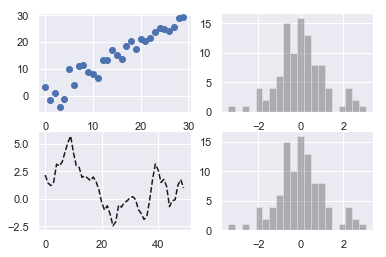

In [471]:
import matplotlib.pyplot as plt 
from numpy.random import randn


# All graphs reside in a figure object
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1) # first position in the square
ax2 = fig.add_subplot(2,2,2) # second position in the figure 
ax3 = fig.add_subplot(2,2,3) # thurd position in the figure 
ax4 = fig.add_subplot(2,2,4) # thurd position in the figure 

# Random sample from normal distribution. 
normal_dist = randn(100)

_ = ax2.hist(normal_dist, bins=20, color='k', alpha=0.3)
_ = ax4.hist(normal_dist, bins=20, color='k', alpha=0.3)
_ = ax1.scatter(np.arange(30), np.arange(30)+ 3 * randn(30))
_ = ax3.plot(randn(50).cumsum(),'--k') # grab 50 samples from a random distribution, and take the cumulative

In [472]:
randn(20) # grab 

array([-2.98537282, -1.91844219, -0.45532526, -0.33134629, -0.39350381,
        2.12410165, -2.58856706, -0.70744824, -0.66859572, -0.0943987 ,
       -0.08860446, -0.15997148, -0.44396789, -0.62340515, -0.06645775,
       -0.3543391 , -0.28869705,  0.7622594 ,  2.08308265,  1.18058221])

In [557]:
make_values = ['Ford','BMW'] # filters  
model_values = ['3','7'] # filters  
filter_dic = {'Make': make_values}
#filter_dic['Model']= model_values

# Get the number of rows in a dataframe 
num_rows = df[column].size
old_key = ''
coll_filter = np.ones(num_rows) # defaults true
all_filters = np.ones(num_rows)

for key in filter_dic:
    for value in filter_dic[key]:     
        if old_key != key:
            all_filters = np.logical_and(all_filters,coll_filter)
            coll_filter = np.zeros(num_rows)
            old_key = key
        
        new_filter = df[key] == value # array with True / False     
        coll_filter = np.logical_or(new_filter, coll_filter)
        

    
df[['Make','Model']][all_filters]

Make
Ford
Make
BMW


,Make,Model
0,Acura,ILX6-Speed
1,Acura,ILX5-Speed
2,Acura,ILX6-Speed
3,Acura,ILX5-Speed
4,Acura,ILXAutomatic
5,Acura,TSXAutomatic
6,Acura,TSXSpecial
7,Acura,ILX6-Speed
8,Acura,ILX5-Speed
9,Acura,ILX5-Speed
